In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("train.csv")

In [4]:
test=pd.read_csv("test.csv")

In [5]:
train

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [6]:
test

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [7]:
train.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
train[train["Item_Weight"]=="NaN"]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

In [12]:
train["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [13]:
train["Item_Weight"]

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

<AxesSubplot:>

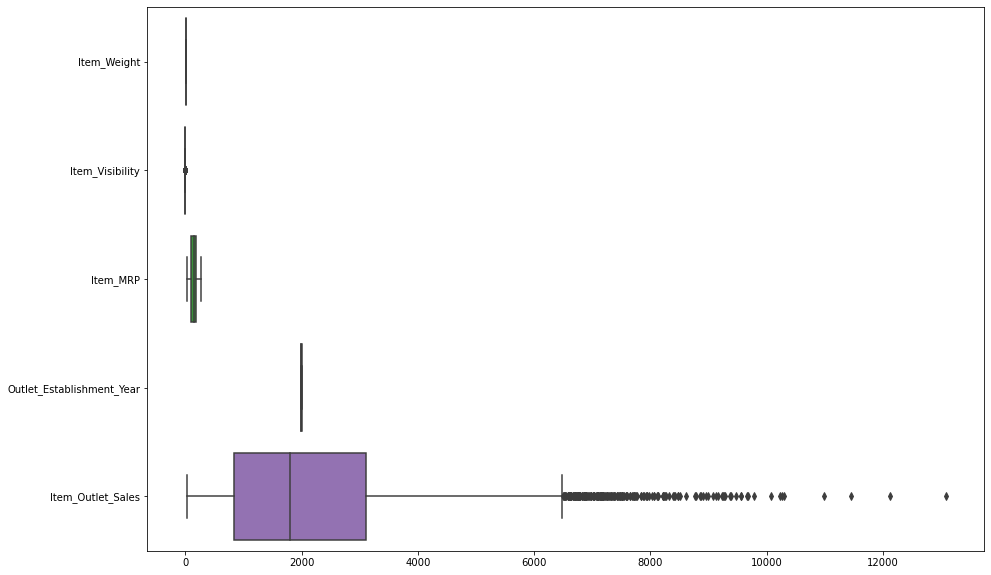

In [14]:
plt.figure(figsize= (15,10))
sns.boxplot(data=train,orient="h")

In [15]:
train.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

In [16]:
train.corr()['Item_Weight'].sort_values()

Item_Visibility             -0.014048
Outlet_Establishment_Year   -0.011588
Item_Outlet_Sales            0.014123
Item_MRP                     0.027141
Item_Weight                  1.000000
Name: Item_Weight, dtype: float64

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Weight'>

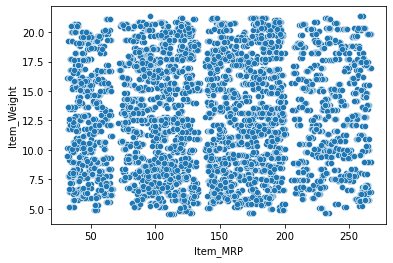

In [17]:
sns.scatterplot(x='Item_MRP',y='Item_Weight',data=train)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Weight'>

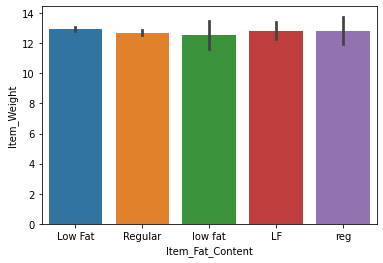

In [19]:
sns.barplot(x='Item_Fat_Content',y='Item_Weight',data= train)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Fat_Content'>

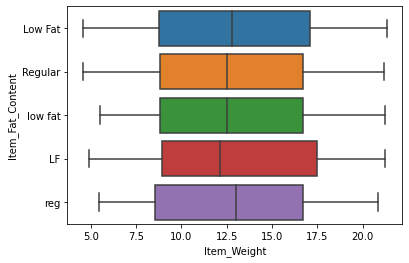

In [20]:
sns.boxplot(y='Item_Fat_Content',x='Item_Weight',data= train)

In [21]:
train[train['Item_Weight'].isnull()]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8485           DRK37          NaN          Low Fat         0.043792   
8487           DRG13          NaN          Low Fat         0.037006   
8488           NCN14          NaN          Low Fat         0.091473   
8490           FDU44          NaN          Regular         0.102296   
8504           NCN18          NaN          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  113.2834            OUT027   
21             Baking Goods  144.5444            OUT027   
23             Baking Goods  107.6938            OUT019   
29                   Canned   43.6454            OUT019   
...                     ...       ...               ...   
8485            Soft Drinks  189.0530            OUT027   
8487            Soft Drinks  164.7526            OUT027   
8488                 Others  184.6608            OUT027   
8490  Fruits and Vegetables  162.3552            OUT019   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7                          1985      Medium               Tier 3   
18                         1985      Medium               Tier 3   
21                         1985      Medium               Tier 3   
23                         1985       Small               Tier 1   
29                         1985       Small               Tier 1   
...                         ...         ...                  ...   
8485                       1985      Medium               Tier 3   
8487                       1985      Medium               Tier 3   
8488                       1985      Medium               Tier 3   
8490                       1985       Small               Tier 1   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7     Supermarket Type3          4022.7636  
18    Supermarket Type3          2303.6680  
21    Supermarket Type3          4064.0432  
23        Grocery Store           214.3876  
29        Grocery Store           125.8362  
...                 ...                ...  
8485  Supermarket Type3          6261.8490  
8487  Supermarket Type3          4111.3150  
8488  Supermarket Type3          2756.4120  
8490      Grocery Store           487.3656  
8504  Supermarket Type3          4138.6128  

[1463 rows x 12 columns]

In [22]:
train[train['Item_Weight'].isnull()]['Item_MRP']

7       107.7622
18      113.2834
21      144.5444
23      107.6938
29       43.6454
          ...   
8485    189.0530
8487    164.7526
8488    184.6608
8490    162.3552
8504    111.7544
Name: Item_MRP, Length: 1463, dtype: float64

In [23]:
train['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [24]:
train['source']='train'
test['source']= 'test'
df= pd.concat([train,test],ignore_index=True)

In [25]:
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1                Soft Drinks   48.2692            OUT018   
2                       Meat  141.6180            OUT049   
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
...                      ...       ...               ...   
14199            Snack Foods  141.3154            OUT046   
14200          Starchy Foods  169.1448            OUT018   
14201     Health and Hygiene  118.7440            OUT045   
14202                 Canned  214.6218            OUT017   
14203                 Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                           1999      Medium               Tier 1   
1                           2009      Medium               Tier 3   
2                           1999      Medium               Tier 1   
3                           1998         NaN               Tier 3   
4                           1987        High               Tier 3   
...                          ...         ...                  ...   
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002         NaN               Tier 2   
14202                       2007         NaN               Tier 2   
14203                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales source  
0      Supermarket Type1          3735.1380  train  
1      Supermarket Type2           443.4228  train  
2      Supermarket Type1          2097.2700  train  
3          Grocery Store           732.3800  train  
4      Supermarket Type1           994.7052  train  
...                  ...                ...    ...  
14199  Supermarket Type1                NaN   test  
14200  Supermarket Type2                NaN   test  
14201  Supermarket Type1                NaN   test  
14202  Supermarket Type1                NaN   test  
14203  Supermarket Type1                NaN   test  

[14204 rows x 13 columns]

In [26]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [27]:
df.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.015901  0.036236   
Item_Visibility              -0.015901         1.000000 -0.006351   
Item_MRP                      0.036236        -0.006351  1.000000   
Outlet_Establishment_Year     0.000645        -0.083678  0.000141   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                 0.000645           0.014123  
Item_Visibility                            -0.083678          -0.128625  
Item_MRP                                    0.000141           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

In [28]:
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

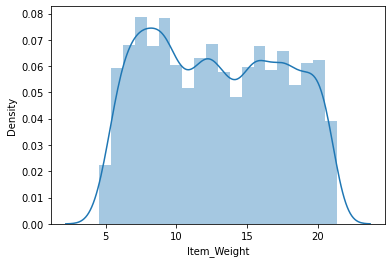

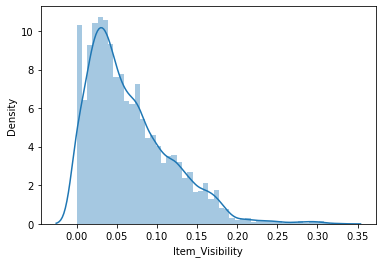

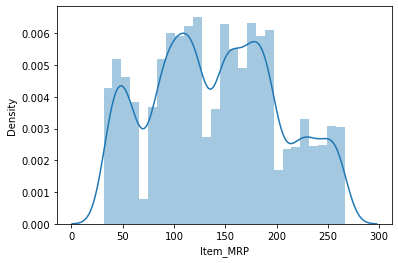

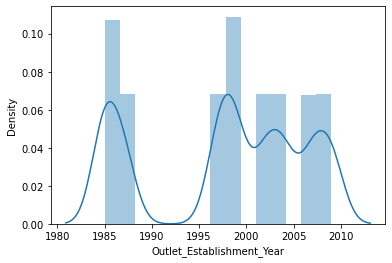

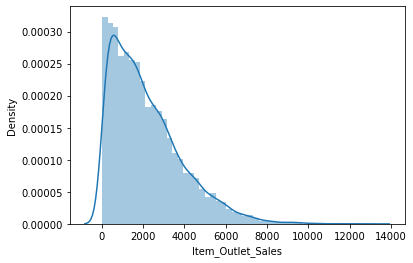

In [29]:
for i in train.describe().columns:
    sns.distplot(train[i].dropna())
    plt.show()

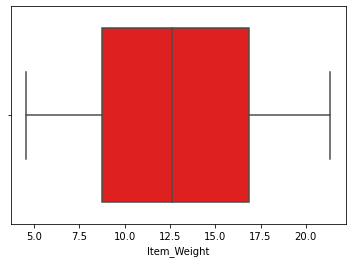

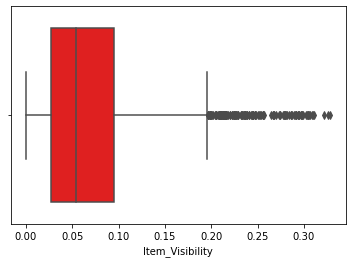

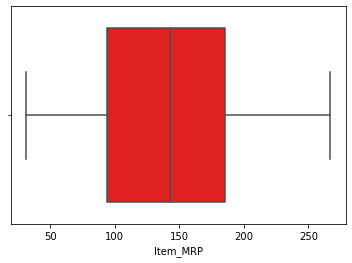

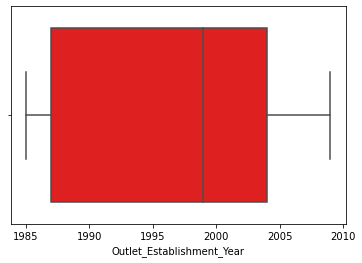

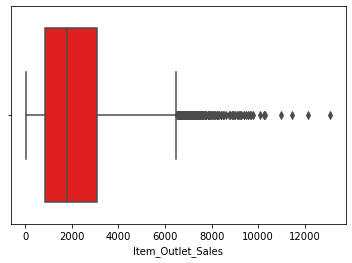

In [30]:
for i in train.describe().columns:
    sns.boxplot(train[i].dropna(),color='r')
    plt.show()

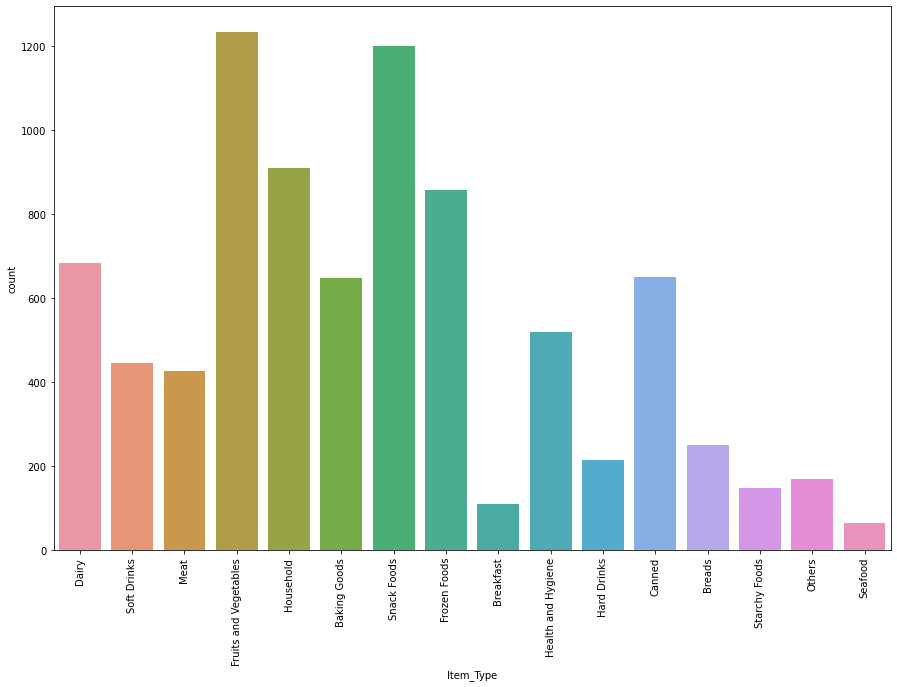

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(train.Item_Type)
plt.xticks(rotation=90);

In [32]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

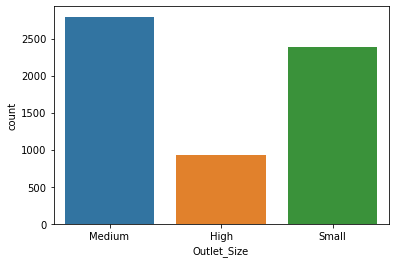

In [33]:
sns.countplot(train.Outlet_Size)

In [34]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

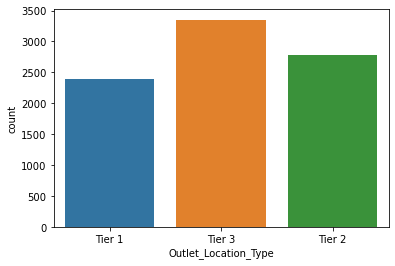

In [35]:
 sns.countplot(train.Outlet_Location_Type)

In [36]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

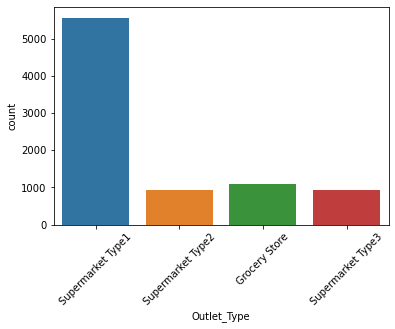

In [37]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=45);


In [38]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

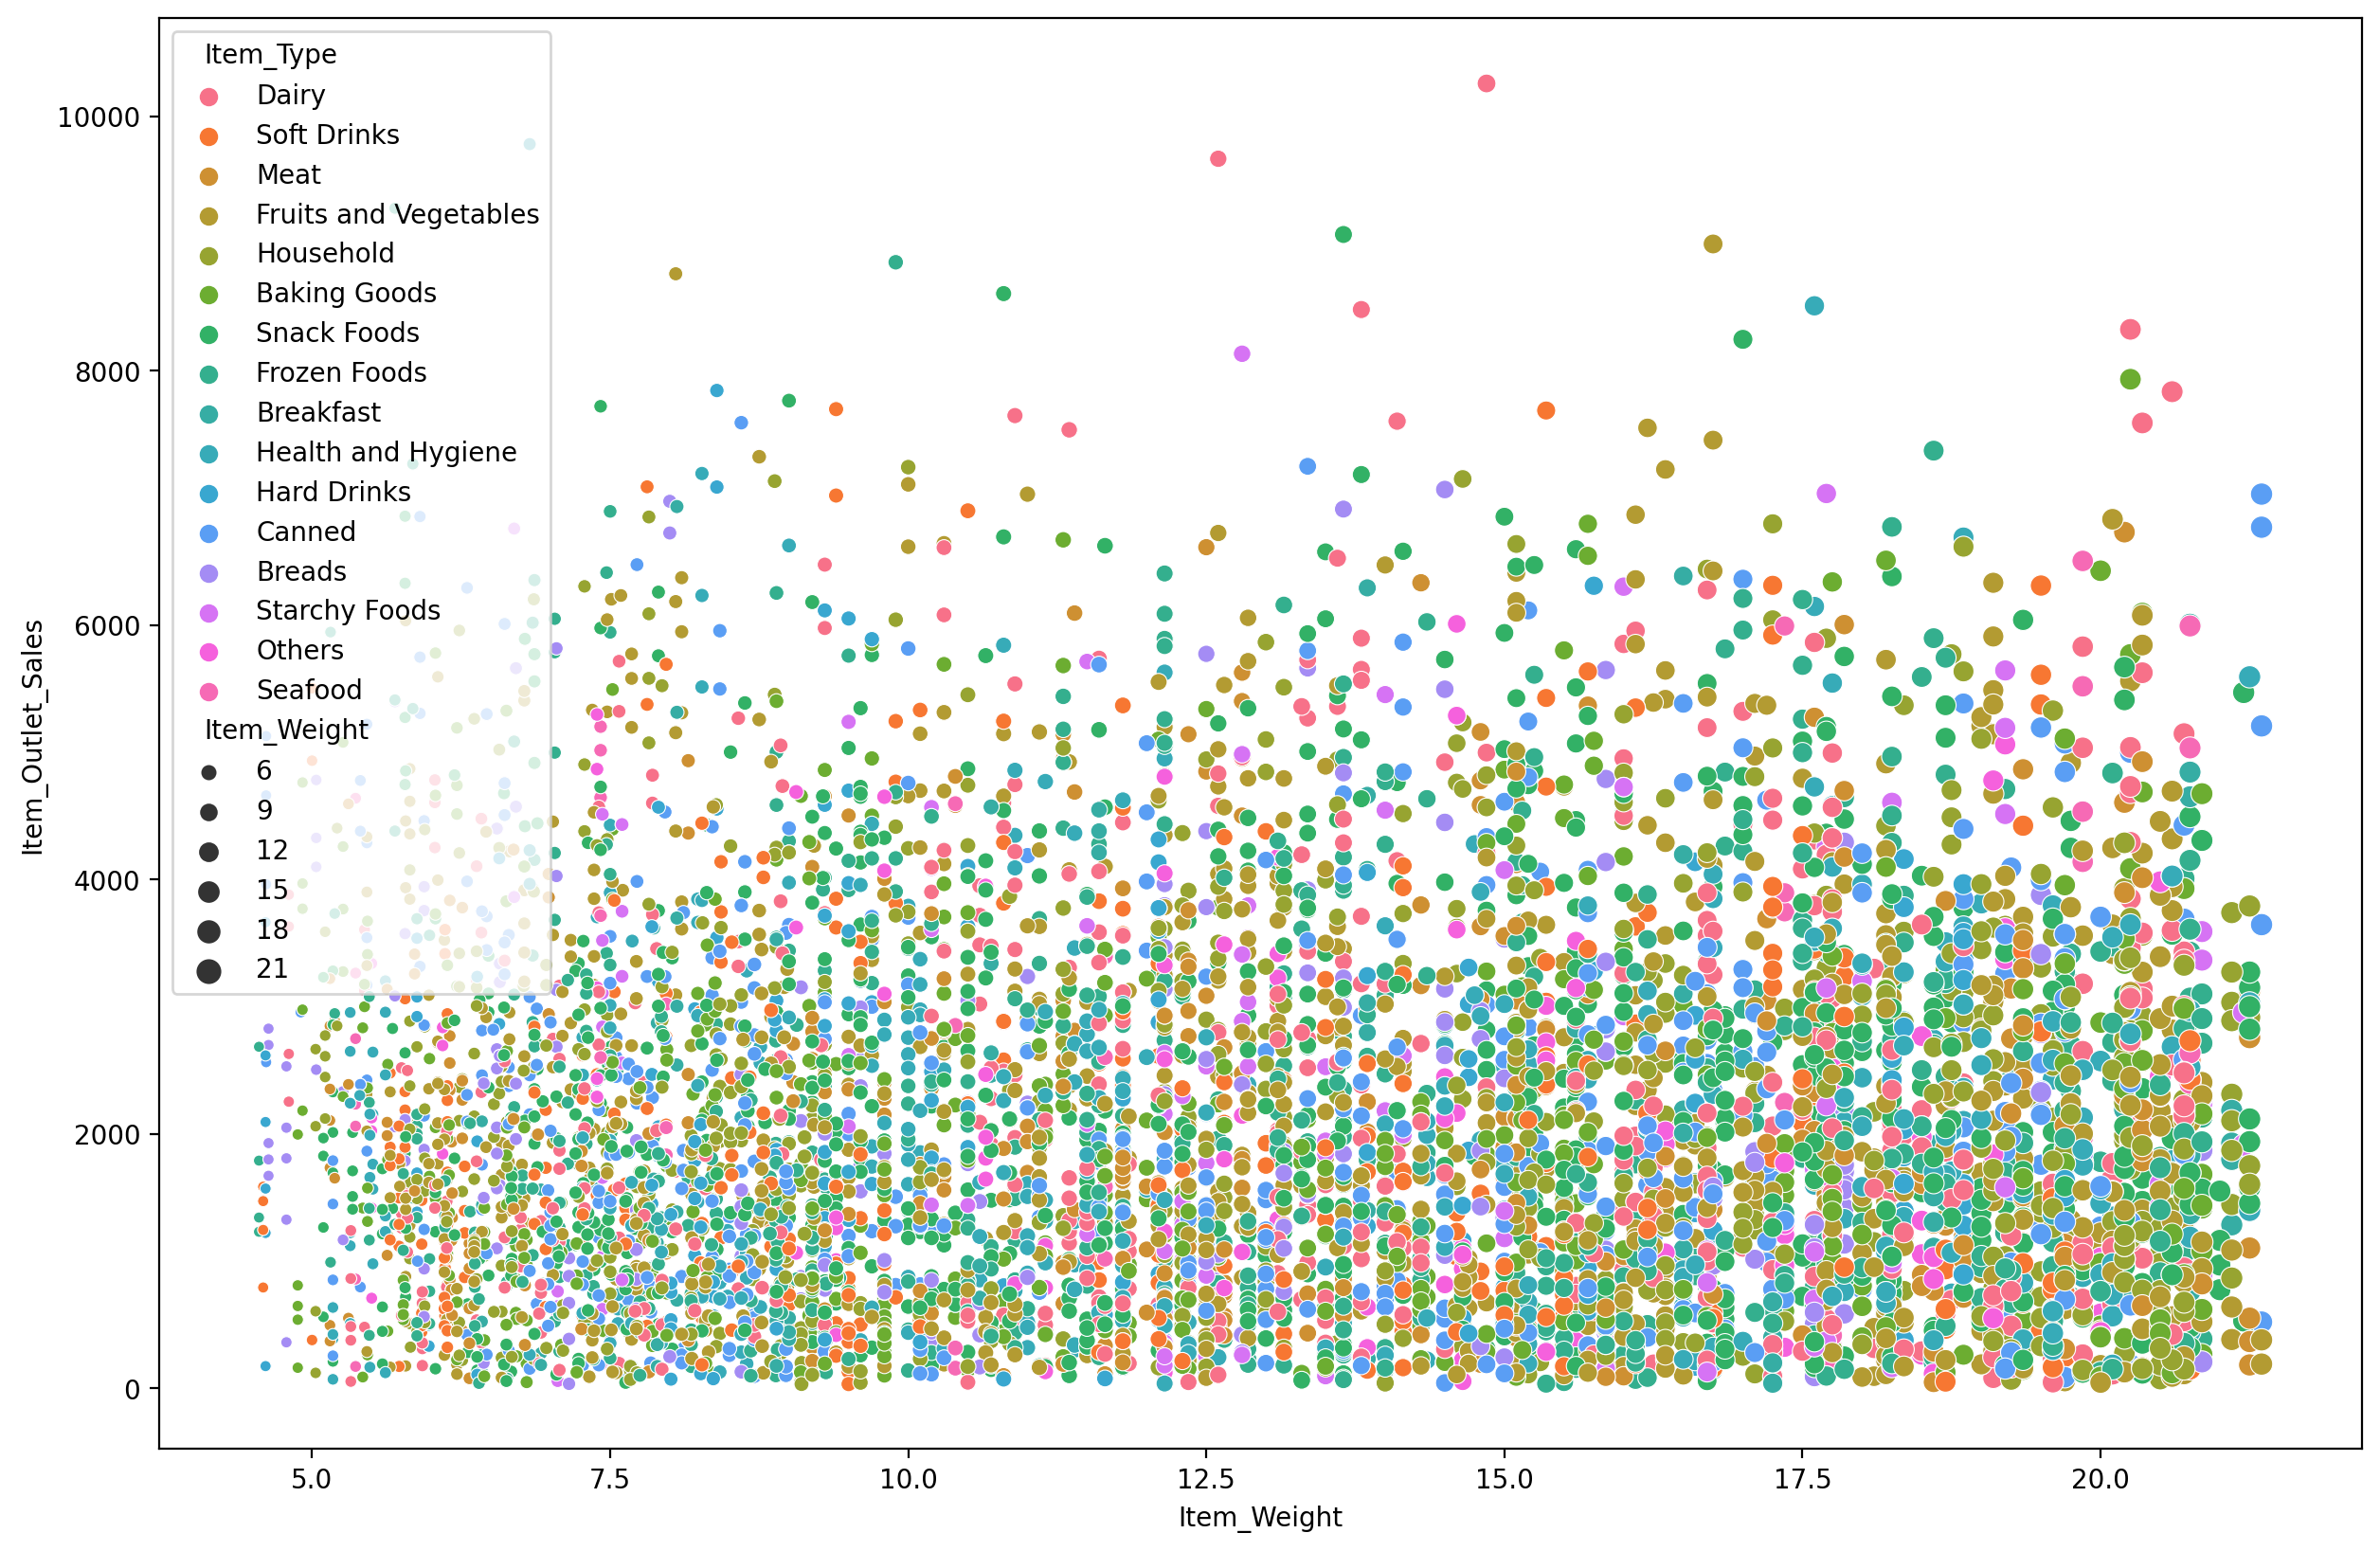

In [39]:
plt.figure(figsize=(15,10),dpi=200)
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=train)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

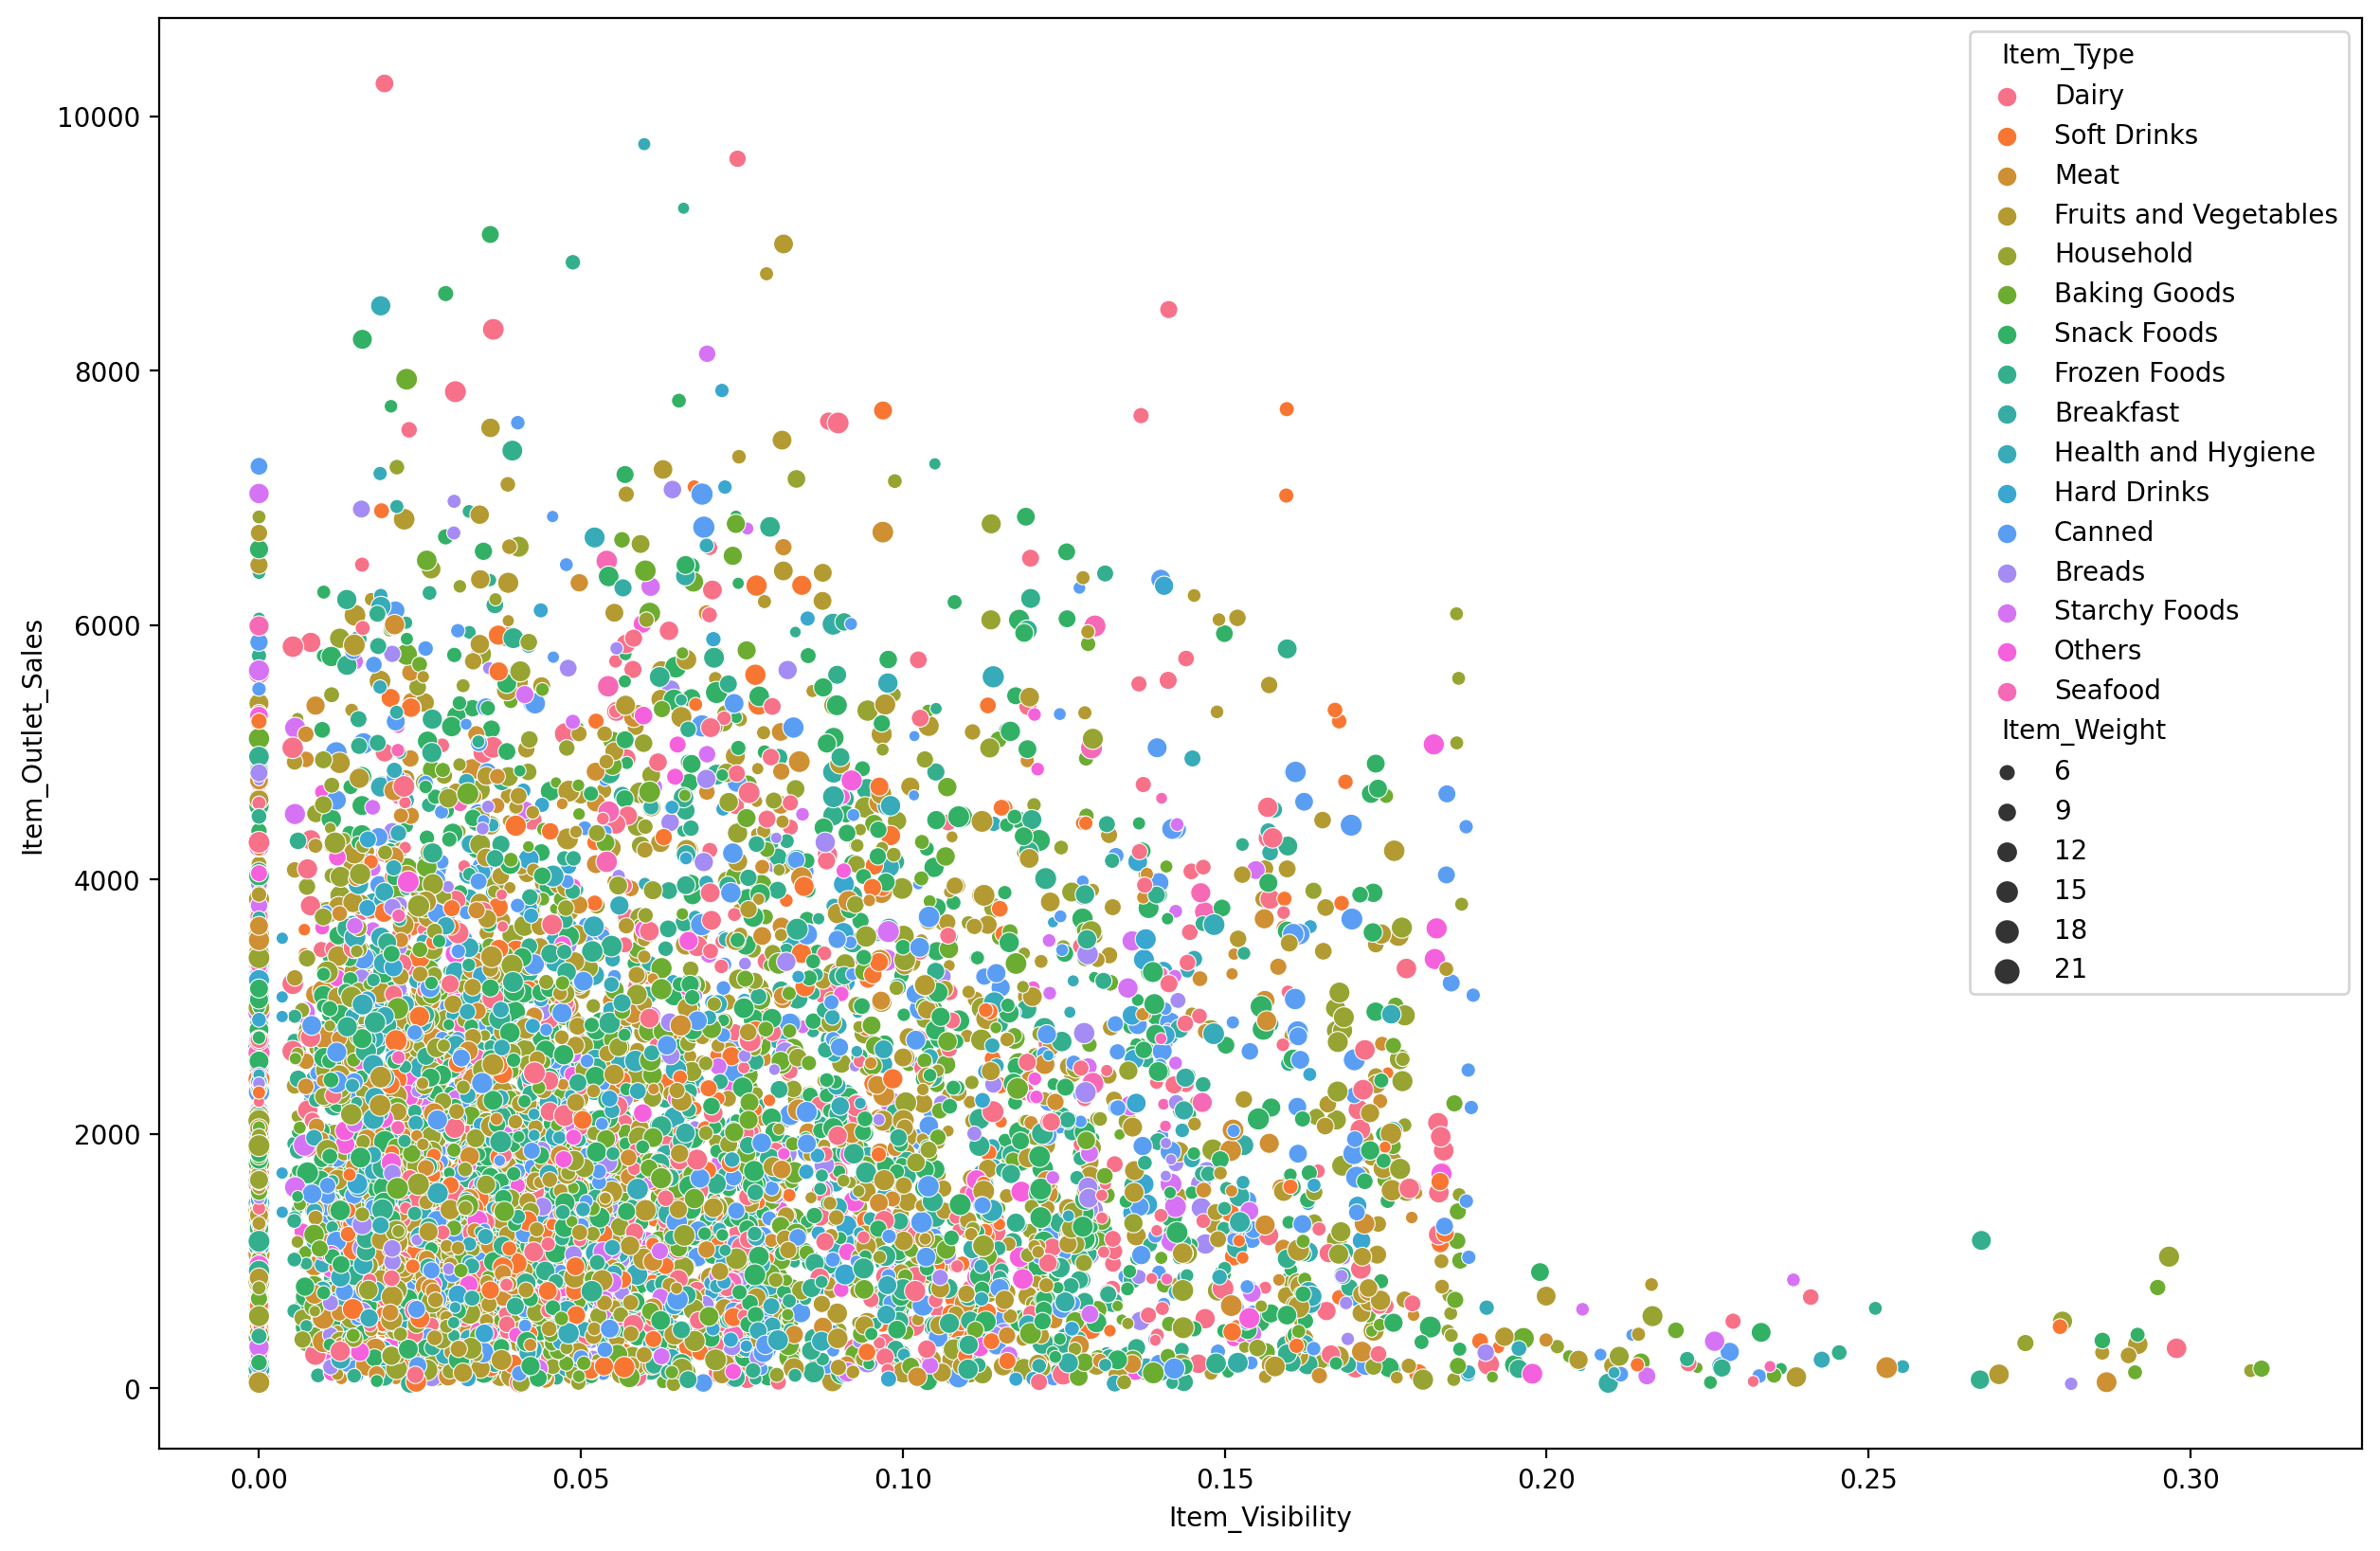

In [40]:
plt.figure(figsize=(15,10),dpi=200)
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=train)

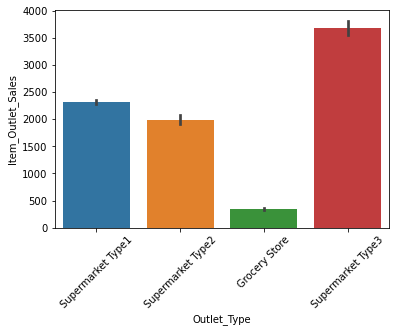

In [41]:
sns.barplot(x='Outlet_Type',y="Item_Outlet_Sales",data= train)
plt.xticks(rotation=45);

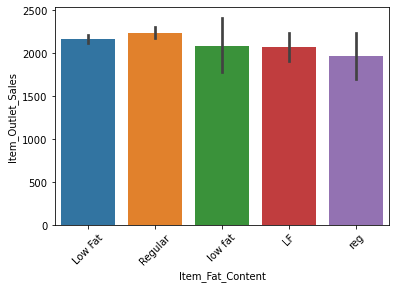

In [42]:
sns.barplot(x='Item_Fat_Content',y="Item_Outlet_Sales",data= train)
plt.xticks(rotation=45);

In [43]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [44]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [45]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [46]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [47]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

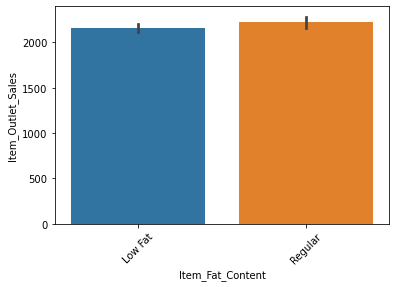

In [48]:
sns.barplot(x='Item_Fat_Content',y="Item_Outlet_Sales",data= train)
plt.xticks(rotation=45);

<AxesSubplot:>

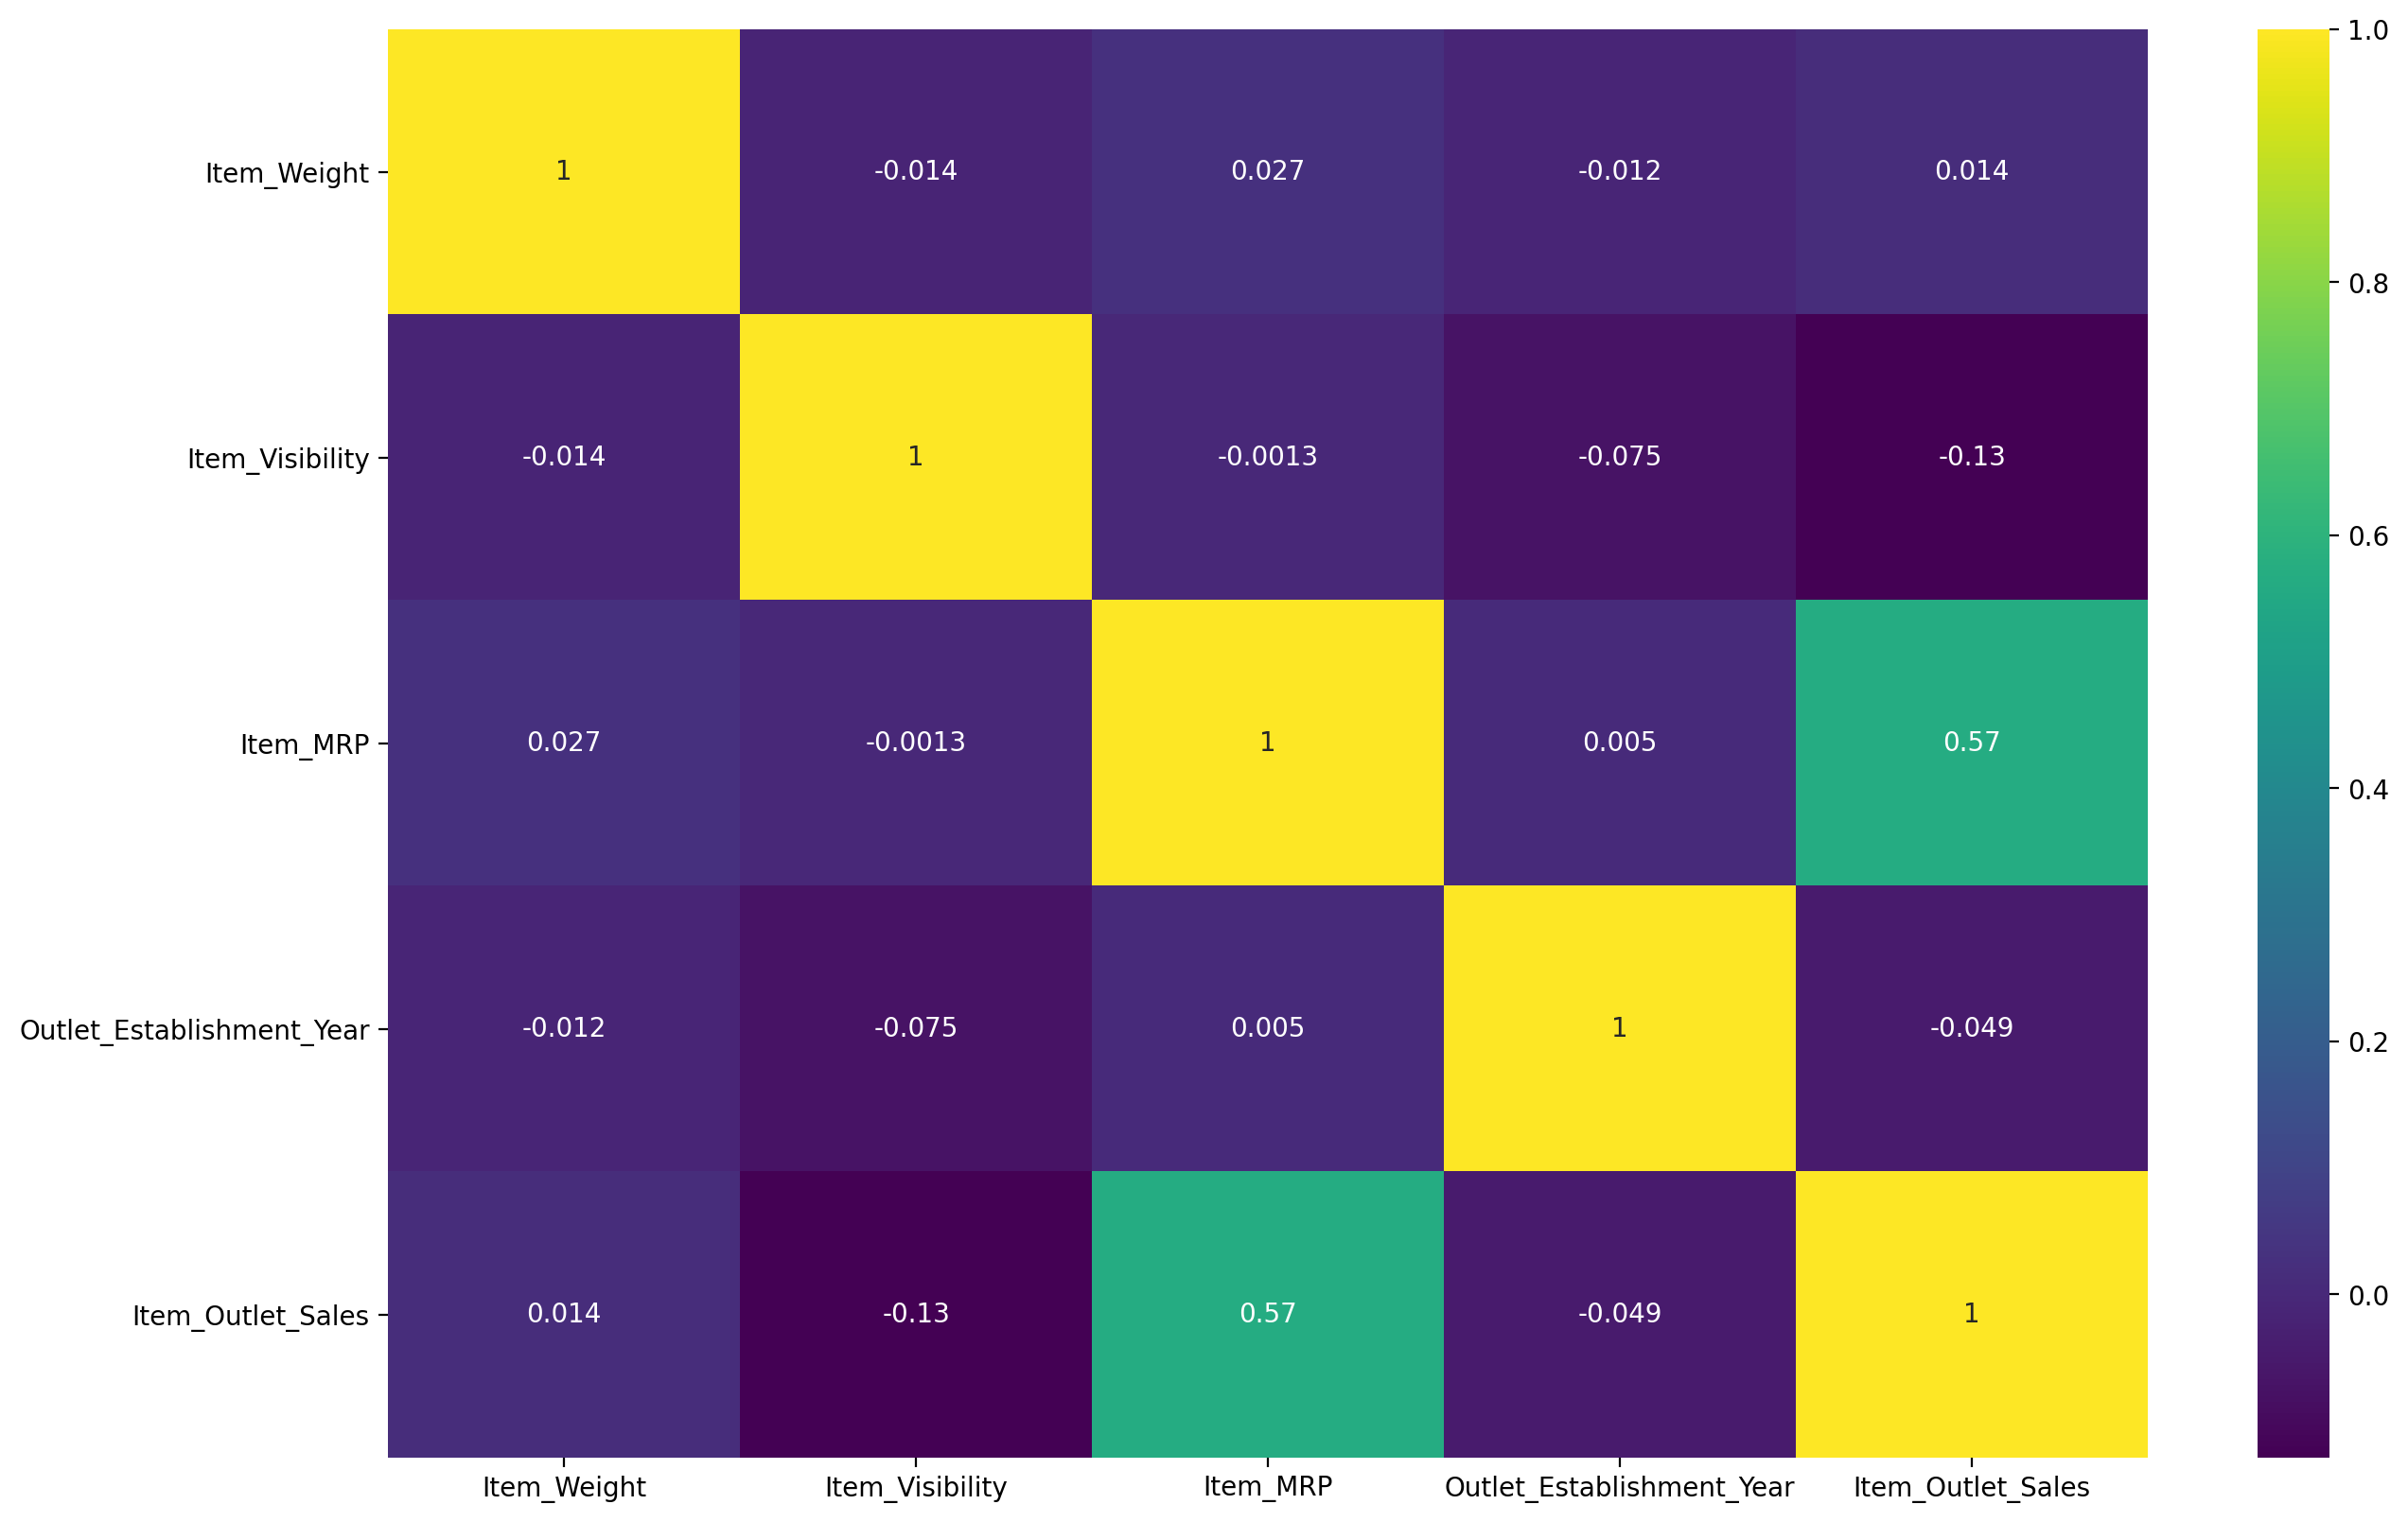

In [49]:
plt.figure(figsize=(15,10),dpi=200)
sns.heatmap(train.corr(),annot=True,cmap='viridis')

In [50]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [51]:
df['Item_Weight'].mean()

12.792854228644991

In [52]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [53]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [54]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [55]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [56]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [57]:
train.shape

(8523, 13)

In [58]:
df[df['Item_Visibility']==0]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3               FDX07    19.200000          Regular              0.0   
4               NCD19     8.930000          Low Fat              0.0   
5               FDP36    10.395000          Regular              0.0   
10              FDY07    11.800000          Low Fat              0.0   
32              FDP33    18.700000          Low Fat              0.0   
...               ...          ...              ...              ...   
14166           FDQ19    12.792854          Regular              0.0   
14171           FDK26    12.792854          Regular              0.0   
14177           FDQ57     7.275000          Low Fat              0.0   
14184           DRG37    12.792854          Low Fat              0.0   
14202           FDJ26    15.300000          Regular              0.0   

                   Item_Type  Item_MRP Outlet_Identifier  \
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
5               Baking Goods   51.4008            OUT018   
10     Fruits and Vegetables   45.5402            OUT049   
32               Snack Foods  256.6672            OUT018   
...                      ...       ...               ...   
14166  Fruits and Vegetables  244.3512            OUT019   
14171                 Canned  187.5240            OUT027   
14177            Snack Foods  144.5760            OUT013   
14184            Soft Drinks  155.7972            OUT027   
14202                 Canned  214.6218            OUT017   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                           1998      Medium               Tier 3   
4                           1987        High               Tier 3   
5                           2009      Medium               Tier 3   
10                          1999      Medium               Tier 1   
32                          2009      Medium               Tier 3   
...                          ...         ...                  ...   
14166                       1985       Small               Tier 1   
14171                       1985      Medium               Tier 3   
14177                       1987        High               Tier 3   
14184                       1985      Medium               Tier 3   
14202                       2007      Medium               Tier 2   

             Outlet_Type  Item_Outlet_Sales source  
3          Grocery Store           732.3800  train  
4      Supermarket Type1           994.7052  train  
5      Supermarket Type2           556.6088  train  
10     Supermarket Type1          1516.0266  train  
32     Supermarket Type2          3068.0064  train  
...                  ...                ...    ...  
14166      Grocery Store                NaN   test  
14171  Supermarket Type3                NaN   test  
14177  Supermarket Type1                NaN   test  
14184  Supermarket Type3                NaN   test  
14202  Supermarket Type1                NaN   test  

[879 rows x 13 columns]

In [59]:
df[df['Item_Visibility']==0]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3               FDX07    19.200000          Regular              0.0   
4               NCD19     8.930000          Low Fat              0.0   
5               FDP36    10.395000          Regular              0.0   
10              FDY07    11.800000          Low Fat              0.0   
32              FDP33    18.700000          Low Fat              0.0   
...               ...          ...              ...              ...   
14166           FDQ19    12.792854          Regular              0.0   
14171           FDK26    12.792854          Regular              0.0   
14177           FDQ57     7.275000          Low Fat              0.0   
14184           DRG37    12.792854          Low Fat              0.0   
14202           FDJ26    15.300000          Regular              0.0   

                   Item_Type  Item_MRP Outlet_Identifier  \
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
5               Baking Goods   51.4008            OUT018   
10     Fruits and Vegetables   45.5402            OUT049   
32               Snack Foods  256.6672            OUT018   
...                      ...       ...               ...   
14166  Fruits and Vegetables  244.3512            OUT019   
14171                 Canned  187.5240            OUT027   
14177            Snack Foods  144.5760            OUT013   
14184            Soft Drinks  155.7972            OUT027   
14202                 Canned  214.6218            OUT017   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                           1998      Medium               Tier 3   
4                           1987        High               Tier 3   
5                           2009      Medium               Tier 3   
10                          1999      Medium               Tier 1   
32                          2009      Medium               Tier 3   
...                          ...         ...                  ...   
14166                       1985       Small               Tier 1   
14171                       1985      Medium               Tier 3   
14177                       1987        High               Tier 3   
14184                       1985      Medium               Tier 3   
14202                       2007      Medium               Tier 2   

             Outlet_Type  Item_Outlet_Sales source  
3          Grocery Store           732.3800  train  
4      Supermarket Type1           994.7052  train  
5      Supermarket Type2           556.6088  train  
10     Supermarket Type1          1516.0266  train  
32     Supermarket Type2          3068.0064  train  
...                  ...                ...    ...  
14166      Grocery Store                NaN   test  
14171  Supermarket Type3                NaN   test  
14177  Supermarket Type1                NaN   test  
14184  Supermarket Type3                NaN   test  
14202  Supermarket Type1                NaN   test  

[879 rows x 13 columns]

In [60]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

In [61]:
df.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [62]:
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [63]:
df.Item_Identifier.value_counts()

FDM25    10
FDT03    10
FDU15    10
FDX36    10
FDX26    10
         ..
NCL42     7
DRN11     7
NCW54     7
FDS22     7
FDM10     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [64]:
#FD=food, DR=drinks, NC= non consumable

In [65]:
df['New_Item_Type']=df['Item_Identifier'].apply(lambda x: x[0:2])

In [66]:
df['New_Item_Type']= df['New_Item_Type'].map({"FD":"Food","NC":"Non-Consumable",'DR':'Drinks'})

In [67]:
df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [68]:
df.loc[df['New_Item_Type']== "Non-Consumable",'Item_Fat_Content']= "Non-Edible"

In [69]:
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [70]:
item_visib_avg=df.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [71]:
item_visib_avg

Item_Visibility
Item_Identifier                 
DRA12                   0.034938
DRA24                   0.045646
DRA59                   0.133384
DRB01                   0.079736
DRB13                   0.006799
...                          ...
NCZ30                   0.027302
NCZ41                   0.056396
NCZ42                   0.011015
NCZ53                   0.026330
NCZ54                   0.081345

[1559 rows x 1 columns]

In [72]:
function= lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]

In [73]:
df['item_visib_avg']= df.apply(function,axis=1).astype(float)

In [74]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93       Non-Edible         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source   New_Item_Type  item_visib_avg  
0  Supermarket Type1          3735.1380  train            Food        0.931078  
1  Supermarket Type2           443.4228  train          Drinks        0.933420  
2  Supermarket Type1          2097.2700  train            Food        0.960069  
3      Grocery Store           732.3800  train            Food        0.000000  
4  Supermarket Type1           994.7052  train  Non-Consumable        0.000000

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
label= LabelEncoder()

In [77]:
df.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [78]:
df['outlet']=label.fit_transform(df['Outlet_Identifier'])

In [79]:
varib= ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_Type']

In [80]:
for i in varib:
    df[i]= label.fit_transform(df[i])

In [81]:
df

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30                 0         0.016047   
1               DRC01         5.92                 2         0.019278   
2               FDN15        17.50                 0         0.016760   
3               FDX07        19.20                 2         0.000000   
4               NCD19         8.93                 1         0.000000   
...               ...          ...               ...              ...   
14199           FDB58        10.50                 2         0.013496   
14200           FDD47         7.60                 2         0.142991   
14201           NCO17        10.00                 1         0.073529   
14202           FDJ26        15.30                 2         0.000000   
14203           FDU37         9.50                 2         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1                Soft Drinks   48.2692            OUT018   
2                       Meat  141.6180            OUT049   
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
...                      ...       ...               ...   
14199            Snack Foods  141.3154            OUT046   
14200          Starchy Foods  169.1448            OUT018   
14201     Health and Hygiene  118.7440            OUT045   
14202                 Canned  214.6218            OUT017   
14203                 Canned   79.7960            OUT045   

       Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                           1999            1                     0   
1                           2009            1                     2   
2                           1999            1                     0   
3                           1998            1                     2   
4                           1987            0                     2   
...                          ...          ...                   ...   
14199                       1997            2                     0   
14200                       2009            1                     2   
14201                       2002            1                     1   
14202                       2007            1                     1   
14203                       2002            1                     1   

       Outlet_Type  Item_Outlet_Sales source  New_Item_Type  item_visib_avg  \
0                1          3735.1380  train              1        0.931078   
1                2           443.4228  train              0        0.933420   
2                1          2097.2700  train              1        0.960069   
3                0           732.3800  train              1        0.000000   
4                1           994.7052  train              2        0.000000   
...            ...                ...    ...            ...             ...   
14199            1                NaN   test              1        0.874729   
14200            2                NaN   test              1        0.878292   
14201            1                NaN   test              2        1.162245   
14202            1                NaN   test              1        0.000000   
14203            1                NaN   test              1        1.029678   

       outlet  
0           9  
1           3  
2           9  
3           0  
4           1  
...       ...  
14199       8  
14200       3  
14201       7  
14202       2  
14203       7  

[14204 rows x 16 columns]

In [82]:
df= pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_Type','outlet'])

In [83]:
df

Item_Identifier  Item_Weight  Item_Visibility              Item_Type  \
0               FDA15         9.30         0.016047                  Dairy   
1               DRC01         5.92         0.019278            Soft Drinks   
2               FDN15        17.50         0.016760                   Meat   
3               FDX07        19.20         0.000000  Fruits and Vegetables   
4               NCD19         8.93         0.000000              Household   
...               ...          ...              ...                    ...   
14199           FDB58        10.50         0.013496            Snack Foods   
14200           FDD47         7.60         0.142991          Starchy Foods   
14201           NCO17        10.00         0.073529     Health and Hygiene   
14202           FDJ26        15.30         0.000000                 Canned   
14203           FDU37         9.50         0.104720                 Canned   

       Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0      249.8092            OUT049                       1999   
1       48.2692            OUT018                       2009   
2      141.6180            OUT049                       1999   
3      182.0950            OUT010                       1998   
4       53.8614            OUT013                       1987   
...         ...               ...                        ...   
14199  141.3154            OUT046                       1997   
14200  169.1448            OUT018                       2009   
14201  118.7440            OUT045                       2002   
14202  214.6218            OUT017                       2007   
14203   79.7960            OUT045                       2002   

       Item_Outlet_Sales source  item_visib_avg  ...  outlet_0  outlet_1  \
0              3735.1380  train        0.931078  ...         0         0   
1               443.4228  train        0.933420  ...         0         0   
2              2097.2700  train        0.960069  ...         0         0   
3               732.3800  train        0.000000  ...         1         0   
4               994.7052  train        0.000000  ...         0         1   
...                  ...    ...             ...  ...       ...       ...   
14199                NaN   test        0.874729  ...         0         0   
14200                NaN   test        0.878292  ...         0         0   
14201                NaN   test        1.162245  ...         0         0   
14202                NaN   test        0.000000  ...         0         0   
14203                NaN   test        1.029678  ...         0         0   

       outlet_2  outlet_3  outlet_4  outlet_5  outlet_6  outlet_7  outlet_8  \
0             0         0         0         0         0         0         0   
1             0         1         0         0         0         0         0   
2             0         0         0         0         0         0         0   
3             0         0         0         0         0         0         0   
4             0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
14199         0         0         0         0         0         0         1   
14200         0         1         0         0         0         0         0   
14201         0         0         0         0         0         1         0   
14202         1         0         0         0         0         0         0   
14203         0         0         0         0         0         1         0   

       outlet_9  
0             1  
1             0  
2             1  
3             0  
4             0  
...         ...  
14199         0  
14200         0  
14201         0  
14202         0  
14203         0  

[14204 rows x 36 columns]

In [84]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
outlet_0                       uint8
o

In [85]:
data= df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1)

In [86]:
data

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0               FDA15         9.30         0.016047  249.8092   
1               DRC01         5.92         0.019278   48.2692   
2               FDN15        17.50         0.016760  141.6180   
3               FDX07        19.20         0.000000  182.0950   
4               NCD19         8.93         0.000000   53.8614   
...               ...          ...              ...       ...   
14199           FDB58        10.50         0.013496  141.3154   
14200           FDD47         7.60         0.142991  169.1448   
14201           NCO17        10.00         0.073529  118.7440   
14202           FDJ26        15.30         0.000000  214.6218   
14203           FDU37         9.50         0.104720   79.7960   

      Outlet_Identifier  Item_Outlet_Sales source  item_visib_avg  \
0                OUT049          3735.1380  train        0.931078   
1                OUT018           443.4228  train        0.933420   
2                OUT049          2097.2700  train        0.960069   
3                OUT010           732.3800  train        0.000000   
4                OUT013           994.7052  train        0.000000   
...                 ...                ...    ...             ...   
14199            OUT046                NaN   test        0.874729   
14200            OUT018                NaN   test        0.878292   
14201            OUT045                NaN   test        1.162245   
14202            OUT017                NaN   test        0.000000   
14203            OUT045                NaN   test        1.029678   

       Item_Fat_Content_0  Item_Fat_Content_1  ...  outlet_0  outlet_1  \
0                       1                   0  ...         0         0   
1                       0                   0  ...         0         0   
2                       1                   0  ...         0         0   
3                       0                   0  ...         1         0   
4                       0                   1  ...         0         1   
...                   ...                 ...  ...       ...       ...   
14199                   0                   0  ...         0         0   
14200                   0                   0  ...         0         0   
14201                   0                   1  ...         0         0   
14202                   0                   0  ...         0         0   
14203                   0                   0  ...         0         0   

       outlet_2  outlet_3  outlet_4  outlet_5  outlet_6  outlet_7  outlet_8  \
0             0         0         0         0         0         0         0   
1             0         1         0         0         0         0         0   
2             0         0         0         0         0         0         0   
3             0         0         0         0         0         0         0   
4             0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
14199         0         0         0         0         0         0         1   
14200         0         1         0         0         0         0         0   
14201         0         0         0         0         0         1         0   
14202         1         0         0         0         0         0         0   
14203         0         0         0         0         0         1         0   

       outlet_9  
0             1  
1             0  
2             1  
3             0  
4             0  
...         ...  
14199         0  
14200         0  
14201         0  
14202         0  
14203         0  

[14204 rows x 34 columns]

In [87]:
train1=data.loc[data['source']=='train']
test1=data.loc[data['source']=='test']

In [88]:
train1.drop(['source'],axis=1 , inplace=True)

In [89]:
train1

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0              FDA15        9.300         0.016047  249.8092   
1              DRC01        5.920         0.019278   48.2692   
2              FDN15       17.500         0.016760  141.6180   
3              FDX07       19.200         0.000000  182.0950   
4              NCD19        8.930         0.000000   53.8614   
...              ...          ...              ...       ...   
8518           FDF22        6.865         0.056783  214.5218   
8519           FDS36        8.380         0.046982  108.1570   
8520           NCJ29       10.600         0.035186   85.1224   
8521           FDN46        7.210         0.145221  103.1332   
8522           DRG01       14.800         0.044878   75.4670   

     Outlet_Identifier  Item_Outlet_Sales  item_visib_avg  Item_Fat_Content_0  \
0               OUT049          3735.1380        0.931078                   1   
1               OUT018           443.4228        0.933420                   0   
2               OUT049          2097.2700        0.960069                   1   
3               OUT010           732.3800        0.000000                   0   
4               OUT013           994.7052        0.000000                   0   
...                ...                ...             ...                 ...   
8518            OUT013          2778.3834        0.874001                   1   
8519            OUT045           549.2850        1.001096                   0   
8520            OUT035          1193.1136        0.998881                   0   
8521            OUT018          1845.5976        1.041620                   0   
8522            OUT046           765.6700        1.027777                   1   

      Item_Fat_Content_1  Item_Fat_Content_2  ...  outlet_0  outlet_1  \
0                      0                   0  ...         0         0   
1                      0                   1  ...         0         0   
2                      0                   0  ...         0         0   
3                      0                   1  ...         1         0   
4                      1                   0  ...         0         1   
...                  ...                 ...  ...       ...       ...   
8518                   0                   0  ...         0         1   
8519                   0                   1  ...         0         0   
8520                   1                   0  ...         0         0   
8521                   0                   1  ...         0         0   
8522                   0                   0  ...         0         0   

      outlet_2  outlet_3  outlet_4  outlet_5  outlet_6  outlet_7  outlet_8  \
0            0         0         0         0         0         0         0   
1            0         1         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
8518         0         0         0         0         0         0         0   
8519         0         0         0         0         0         1         0   
8520         0         0         0         0         1         0         0   
8521         0         1         0         0         0         0         0   
8522         0         0         0         0         0         0         1   

      outlet_9  
0            1  
1            0  
2            1  
3            0  
4            0  
...        ...  
8518         0  
8519         0  
8520         0  
8521         0  
8522         0  

[8523 rows x 33 columns]

In [90]:
test1.drop(['source','Item_Outlet_Sales'],axis=1 , inplace=True)

In [91]:
test1

Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
8523            FDW58    20.750000         0.007565  107.8622   
8524            FDW14     8.300000         0.038428   87.3198   
8525            NCN55    14.600000         0.099575  241.7538   
8526            FDQ58     7.315000         0.015388  155.0340   
8527            FDY38    12.792854         0.118599  234.2300   
...               ...          ...              ...       ...   
14199           FDB58    10.500000         0.013496  141.3154   
14200           FDD47     7.600000         0.142991  169.1448   
14201           NCO17    10.000000         0.073529  118.7440   
14202           FDJ26    15.300000         0.000000  214.6218   
14203           FDU37     9.500000         0.104720   79.7960   

      Outlet_Identifier  item_visib_avg  Item_Fat_Content_0  \
8523             OUT049        1.029192                   1   
8524             OUT017        1.130311                   0   
8525             OUT010        1.735215                   0   
8526             OUT017        1.291577                   1   
8527             OUT027        0.917824                   0   
...                 ...             ...                 ...   
14199            OUT046        0.874729                   0   
14200            OUT018        0.878292                   0   
14201            OUT045        1.162245                   0   
14202            OUT017        0.000000                   0   
14203            OUT045        1.029678                   0   

       Item_Fat_Content_1  Item_Fat_Content_2  Outlet_Location_Type_0  ...  \
8523                    0                   0                       1  ...   
8524                    0                   1                       0  ...   
8525                    1                   0                       0  ...   
8526                    0                   0                       0  ...   
8527                    0                   1                       0  ...   
...                   ...                 ...                     ...  ...   
14199                   0                   1                       1  ...   
14200                   0                   1                       0  ...   
14201                   1                   0                       0  ...   
14202                   0                   1                       0  ...   
14203                   0                   1                       0  ...   

       outlet_0  outlet_1  outlet_2  outlet_3  outlet_4  outlet_5  outlet_6  \
8523          0         0         0         0         0         0         0   
8524          0         0         1         0         0         0         0   
8525          1         0         0         0         0         0         0   
8526          0         0         1         0         0         0         0   
8527          0         0         0         0         0         1         0   
...         ...       ...       ...       ...       ...       ...       ...   
14199         0         0         0         0         0         0         0   
14200         0         0         0         1         0         0         0   
14201         0         0         0         0         0         0         0   
14202         0         0         1         0         0         0         0   
14203         0         0         0         0         0         0         0   

       outlet_7  outlet_8  outlet_9  
8523          0         0         1  
8524          0         0         0  
8525          0         0         0  
8526          0         0         0  
8527          0         0         0  
...         ...       ...       ...  
14199         0         1         0  
14200         0         0         0  
14201         1         0         0  
14202         0         0         0  
14203         1         0         0  

[5681 rows x 32 columns]